# Example data processing procedures (Negishi dataset)

In [1]:
# import required modules
import os
import rdkit
import re
from rdkit import Chem
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Loading data from Reaxys&reg; export
Assumes a query results set has been exported and saved as a file 'negishi.csv' in the same directory as this notebook. No data is included here for copyright purposes. See https://doi.org/10.26434/chemrxiv.12613214.v1 for a description of Reaxys&reg; exporting.

In [2]:
# load dataset from Reaxys(R) csv export to pandas dataframe
negishi_df = pd.read_csv('negishi.csv')

# visualize dataframe
negishi_df

,Reaction ID,References,Links to Reaxys,Reaction: Links to Reaxys,Reaction,Temperature (Reaction Details) [C],Yield (numerical),Reagent,Catalyst,Solvent (Reaction Details)
0,36844980,"Patent; ZENTIVA, K.S.; RADL Stanislav; DOUBSKY...",https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)O...,60,0.52,palladium diacetate; ruphos,NaN,tetrahydrofuran
1,28516312,"Patent; Gilead Sciences, Inc.; Korea Research ...",https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(Br)=CC(C)=C1....,100,0.6,zinc,tris-(dibenzylideneacetone)dipalladium(0),"N,N-dimethyl-formamide"
2,24802995,Patent; MEMORY PHARMACEUTICALS CORPORATION; WO...,https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,COC1=C(OC)C=C2C(Br)=CN=NC2=C1.Br[Zn]C1=NC=CS1>...,100,1,NaN,tetrakis(triphenylphosphine) palladium(0),tetrahydrofuran
3,41263899,"Article; Murphy-Benenato, Kerry E.; Gingipalli...",https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,Br[Zn]C1=CC=CN=C1.CSC1=NC(=NC2=NC(N)=C(C#N)C(N...,65,2,tetrakis(triphenylphosphine) palladium(0),NaN,tetrahydrofuran
4,44324735,"Article; Greshock, Thomas J.; Moore, Keith P.;...",https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,CC(C)(C)C([O-])=O.[Zn+]CC1=NC=C(CN2CCOCC2)C=C1...,50,2,"((2-dicyclohexylphosphino-2',4?,6?-triisopropy...",NaN,tetrahydrofuran
...,...,...,...,...,...,...,...,...,...,...
11383,22895068,"Patent; Shin-Etsu Chemical Co., Ltd.; US636927...",https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,CC(=O)OC1=C(C=CC(I)=C1)C(F)(F)F.Cl[Zn]C=C>>CC(...,NaN,NaN,NaN,NaN,NaN
11384,22895069,"Patent; Shin-Etsu Chemical Co., Ltd.; US636927...",https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,Cl[Zn]C=C.CC(C)(C)OC1=C(F)C(F)=C(I)C(F)=C1F>>C...,NaN,NaN,NaN,NaN,NaN
11385,22895070,"Patent; Shin-Etsu Chemical Co., Ltd.; US636927...",https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,CC(C)(C)OC1=CC=C(F)C(I)=C1.Cl[Zn]C=C>>CC(C)(C)...,NaN,NaN,NaN,NaN,NaN
11386,22895072,"Patent; Shin-Etsu Chemical Co., Ltd.; US636927...",https://www.reaxys.com/reaxys/secured/hopinto....,https://www.reaxys.com/reaxys/secured/hopinto....,FC1=CC(OCC=C)=C(I)C=C1.CC(=C)[Zn]Cl>>CC(=C)C1=...,NaN,NaN,NaN,NaN,NaN


In [3]:
# trim dataframe to the desired columns
negishi_df = negishi_df.drop(['References', 'Links to Reaxys', 
                              'Reaction: Links to Reaxys'], axis=1)

# check the new dataframe columns
negishi_df.columns.tolist()

['Reaction ID',
 'Reaction',
 'Temperature (Reaction Details) [C]',
 'Yield (numerical)',
 'Reagent',
 'Catalyst',
 'Solvent (Reaction Details)']

In [4]:
# visualize the new dataframe
negishi_df

,Reaction ID,Reaction,Temperature (Reaction Details) [C],Yield (numerical),Reagent,Catalyst,Solvent (Reaction Details)
0,36844980,CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)O...,60,0.52,palladium diacetate; ruphos,NaN,tetrahydrofuran
1,28516312,CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(Br)=CC(C)=C1....,100,0.6,zinc,tris-(dibenzylideneacetone)dipalladium(0),"N,N-dimethyl-formamide"
2,24802995,COC1=C(OC)C=C2C(Br)=CN=NC2=C1.Br[Zn]C1=NC=CS1>...,100,1,NaN,tetrakis(triphenylphosphine) palladium(0),tetrahydrofuran
3,41263899,Br[Zn]C1=CC=CN=C1.CSC1=NC(=NC2=NC(N)=C(C#N)C(N...,65,2,tetrakis(triphenylphosphine) palladium(0),NaN,tetrahydrofuran
4,44324735,CC(C)(C)C([O-])=O.[Zn+]CC1=NC=C(CN2CCOCC2)C=C1...,50,2,"((2-dicyclohexylphosphino-2',4?,6?-triisopropy...",NaN,tetrahydrofuran
...,...,...,...,...,...,...,...
11383,22895068,CC(=O)OC1=C(C=CC(I)=C1)C(F)(F)F.Cl[Zn]C=C>>CC(...,NaN,NaN,NaN,NaN,NaN
11384,22895069,Cl[Zn]C=C.CC(C)(C)OC1=C(F)C(F)=C(I)C(F)=C1F>>C...,NaN,NaN,NaN,NaN,NaN
11385,22895070,CC(C)(C)OC1=CC=C(F)C(I)=C1.Cl[Zn]C=C>>CC(C)(C)...,NaN,NaN,NaN,NaN,NaN
11386,22895072,FC1=CC(OCC=C)=C(I)C=C1.CC(=C)[Zn]Cl>>CC(=C)C1=...,NaN,NaN,NaN,NaN,NaN


## Trim dataset where required values are missing

In [5]:
# get overview of missing values and dtypes 
negishi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11388 entries, 0 to 11387
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Reaction ID                         11388 non-null  int64 
 1   Reaction                            11355 non-null  object
 2   Temperature (Reaction Details) [C]  9676 non-null   object
 3   Yield (numerical)                   7685 non-null   object
 4   Reagent                             8719 non-null   object
 5   Catalyst                            3332 non-null   object
 6   Solvent (Reaction Details)          10739 non-null  object
dtypes: int64(1), object(6)
memory usage: 622.9+ KB


In [6]:
# remove reactions without reported yields, solvent, or reaction encoding
# reactions without reagents or catalysts were retained in this dataset as
# there are known examples where, e.g., heating is sufficient for reactivity
negishi_df = negishi_df[negishi_df['Yield (numerical)'].notna()]
negishi_df = negishi_df[negishi_df['Solvent (Reaction Details)'].notna()]
negishi_df = negishi_df[negishi_df['Reaction'].notna()]

# get overview of missing values and dtypes 
negishi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 0 to 7684
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Reaction ID                         7406 non-null   int64 
 1   Reaction                            7406 non-null   object
 2   Temperature (Reaction Details) [C]  6592 non-null   object
 3   Yield (numerical)                   7406 non-null   object
 4   Reagent                             5975 non-null   object
 5   Catalyst                            1882 non-null   object
 6   Solvent (Reaction Details)          7406 non-null   object
dtypes: int64(1), object(6)
memory usage: 462.9+ KB


In [7]:
# visualize current dataframe
negishi_df

,Reaction ID,Reaction,Temperature (Reaction Details) [C],Yield (numerical),Reagent,Catalyst,Solvent (Reaction Details)
0,36844980,CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)O...,60,0.52,palladium diacetate; ruphos,NaN,tetrahydrofuran
1,28516312,CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(Br)=CC(C)=C1....,100,0.6,zinc,tris-(dibenzylideneacetone)dipalladium(0),"N,N-dimethyl-formamide"
2,24802995,COC1=C(OC)C=C2C(Br)=CN=NC2=C1.Br[Zn]C1=NC=CS1>...,100,1,NaN,tetrakis(triphenylphosphine) palladium(0),tetrahydrofuran
3,41263899,Br[Zn]C1=CC=CN=C1.CSC1=NC(=NC2=NC(N)=C(C#N)C(N...,65,2,tetrakis(triphenylphosphine) palladium(0),NaN,tetrahydrofuran
4,44324735,CC(C)(C)C([O-])=O.[Zn+]CC1=NC=C(CN2CCOCC2)C=C1...,50,2,"((2-dicyclohexylphosphino-2',4?,6?-triisopropy...",NaN,tetrahydrofuran
...,...,...,...,...,...,...,...
7680,4559574,CC1=CN(=O)=C(C)C(Cl)=N1.CC(C)CC[Zn]CCC(C)C.CC1...,NaN,57; 19,"1,3-bis[(diphenylphosphino)propane]dichloronic...",NaN,tetrahydrofuran
7681,42535671,CCC1=C(C)C2=C(C)C3=C(Br)C(Br)=C(Br)N3[B](F)(F)...,20,57; 33,bis-triphenylphosphine-palladium(II) chloride,NaN,toluene
7682,2446129,CCCC\C=C\[Zn]\C=C\CCCC.FC(F)(F)S(=O)(=O)OC1=CC...,25,6; 83,bis-triphenylphosphine-palladium(II) chloride;...,NaN,"N,N-dimethyl-formamide"
7683,9515318,CCCCCC\C=C(/Br)Br.Br[Zn]C1=NC=CS1.CCCCCC\C=C(/...,23,6; 84,NaN,Cl2Pd(DPEphos),toluene


## Separate starting materials and products from the reaction SMILES

In [8]:
# split 'Reaction' into 'reactants' and 'products' by '>>' and
# drop 'Reaction' column
negishi_df[['reactants', 'products']] = negishi_df['Reaction'].str.split('>>',
                                                                         expand=True)
negishi_df = negishi_df.drop(['Reaction'], axis=1)

# visualize change
negishi_df

,Reaction ID,Temperature (Reaction Details) [C],Yield (numerical),Reagent,Catalyst,Solvent (Reaction Details),reactants,products
0,36844980,60,0.52,palladium diacetate; ruphos,NaN,tetrahydrofuran,CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)O...,CCCCCCCCC1=CC=C(CCC2(COC(C)(C)OC2)NC(=O)OC(C)(...
1,28516312,100,0.6,zinc,tris-(dibenzylideneacetone)dipalladium(0),"N,N-dimethyl-formamide",CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(Br)=CC(C)=C1....,CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(C)=CC(=C1)C#N
2,24802995,100,1,NaN,tetrakis(triphenylphosphine) palladium(0),tetrahydrofuran,COC1=C(OC)C=C2C(Br)=CN=NC2=C1.Br[Zn]C1=NC=CS1,COC1=C(OC)C=C2C(=C1)N=NC=C2C1=NC=CS1
3,41263899,65,2,tetrakis(triphenylphosphine) palladium(0),NaN,tetrahydrofuran,Br[Zn]C1=CC=CN=C1.CSC1=NC(=NC2=NC(N)=C(C#N)C(N...,CC(C)(C)C1=NC2=NC(N)=C(C#N)C(N)=C2C(=N1)C1=CC=...
4,44324735,50,2,"((2-dicyclohexylphosphino-2',4?,6?-triisopropy...",NaN,tetrahydrofuran,CC(C)(C)C([O-])=O.[Zn+]CC1=NC=C(CN2CCOCC2)C=C1...,O=C(OCC1=CC=CC=C1)N1CCC[C@H]1C(=O)C1=CNC2=C1C=...
...,...,...,...,...,...,...,...,...
7680,4559574,NaN,57; 19,"1,3-bis[(diphenylphosphino)propane]dichloronic...",NaN,tetrahydrofuran,CC1=CN(=O)=C(C)C(Cl)=N1.CC(C)CC[Zn]CCC(C)C.CC1...,CC(C)CCC1=NC(C)=CN(=O)=C1C.CC(C)CCC1=C(C)N=CC(...
7681,42535671,20,57; 33,bis-triphenylphosphine-palladium(II) chloride,NaN,toluene,CCC1=C(C)C2=C(C)C3=C(Br)C(Br)=C(Br)N3[B](F)(F)...,CCC1=C(C)C2=C(C)C3=C(C)C(Br)=C(C)N3[B](F)(F)[N...
7682,2446129,25,6; 83,bis-triphenylphosphine-palladium(II) chloride;...,NaN,"N,N-dimethyl-formamide",CCCC\C=C\[Zn]\C=C\CCCC.FC(F)(F)S(=O)(=O)OC1=CC...,CCCC\C=C\C=C\CCCC.CCCC\C=C\C1=CCCCC1=O
7683,9515318,23,6; 84,NaN,Cl2Pd(DPEphos),toluene,CCCCCC\C=C(/Br)Br.Br[Zn]C1=NC=CS1.CCCCCC\C=C(/...,CCCCCCC#CC1=NC=CS1.CCCCCC\C=C(Br)\C1=NC=CS1


In [9]:
# check overview of missing values and dtypes 
negishi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 0 to 7684
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Reaction ID                         7406 non-null   int64 
 1   Temperature (Reaction Details) [C]  6592 non-null   object
 2   Yield (numerical)                   7406 non-null   object
 3   Reagent                             5975 non-null   object
 4   Catalyst                            1882 non-null   object
 5   Solvent (Reaction Details)          7406 non-null   object
 6   reactants                           7406 non-null   object
 7   products                            7406 non-null   object
dtypes: int64(1), object(7)
memory usage: 520.7+ KB


## Separate multiple components of each reaction condition type

In [10]:
# split 'Temperature (Reaction Details) [C]', 'Yield (numerical)', 'Reagent',
# 'Catalyst', 'Solvent (Reaction Details)' to lists by ';' in place
col_splits = ['Yield (numerical)', 'Reagent',
          'Catalyst', 'Solvent (Reaction Details)']
for col in col_splits:
    negishi_df[[col]] = negishi_df[col].str.split(';')

In [11]:
# visualize change
negishi_df

,Reaction ID,Temperature (Reaction Details) [C],Yield (numerical),Reagent,Catalyst,Solvent (Reaction Details),reactants,products
0,36844980,60,[0.52],"[palladium diacetate, ruphos]",NaN,[tetrahydrofuran],CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)O...,CCCCCCCCC1=CC=C(CCC2(COC(C)(C)OC2)NC(=O)OC(C)(...
1,28516312,100,[0.6],[zinc],[tris-(dibenzylideneacetone)dipalladium(0)],"[N,N-dimethyl-formamide]",CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(Br)=CC(C)=C1....,CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(C)=CC(=C1)C#N
2,24802995,100,[1],NaN,[tetrakis(triphenylphosphine) palladium(0)],[tetrahydrofuran],COC1=C(OC)C=C2C(Br)=CN=NC2=C1.Br[Zn]C1=NC=CS1,COC1=C(OC)C=C2C(=C1)N=NC=C2C1=NC=CS1
3,41263899,65,[2],[tetrakis(triphenylphosphine) palladium(0)],NaN,[tetrahydrofuran],Br[Zn]C1=CC=CN=C1.CSC1=NC(=NC2=NC(N)=C(C#N)C(N...,CC(C)(C)C1=NC2=NC(N)=C(C#N)C(N)=C2C(=N1)C1=CC=...
4,44324735,50,[2],"[((2-dicyclohexylphosphino-2',4?,6?-triisoprop...",NaN,[tetrahydrofuran],CC(C)(C)C([O-])=O.[Zn+]CC1=NC=C(CN2CCOCC2)C=C1...,O=C(OCC1=CC=CC=C1)N1CCC[C@H]1C(=O)C1=CNC2=C1C=...
...,...,...,...,...,...,...,...,...
7680,4559574,NaN,"[57, 19]","[1,3-bis[(diphenylphosphino)propane]dichloroni...",NaN,[tetrahydrofuran],CC1=CN(=O)=C(C)C(Cl)=N1.CC(C)CC[Zn]CCC(C)C.CC1...,CC(C)CCC1=NC(C)=CN(=O)=C1C.CC(C)CCC1=C(C)N=CC(...
7681,42535671,20,"[57, 33]",[bis-triphenylphosphine-palladium(II) chloride],NaN,[toluene],CCC1=C(C)C2=C(C)C3=C(Br)C(Br)=C(Br)N3[B](F)(F)...,CCC1=C(C)C2=C(C)C3=C(C)C(Br)=C(C)N3[B](F)(F)[N...
7682,2446129,25,"[6, 83]",[bis-triphenylphosphine-palladium(II) chloride...,NaN,"[N,N-dimethyl-formamide]",CCCC\C=C\[Zn]\C=C\CCCC.FC(F)(F)S(=O)(=O)OC1=CC...,CCCC\C=C\C=C\CCCC.CCCC\C=C\C1=CCCCC1=O
7683,9515318,23,"[6, 84]",NaN,[Cl2Pd(DPEphos)],[toluene],CCCCCC\C=C(/Br)Br.Br[Zn]C1=NC=CS1.CCCCCC\C=C(/...,CCCCCCC#CC1=NC=CS1.CCCCCC\C=C(Br)\C1=NC=CS1


## Separate individual molecules in the reaction

In [12]:
# split 'reactants' and 'products' into lists by '.' in place
col_splits_2 = ['reactants', 'products']
for col in col_splits_2:
    negishi_df[[col]] = negishi_df[col].str.split('.')
    
# visualize change
negishi_df

,Reaction ID,Temperature (Reaction Details) [C],Yield (numerical),Reagent,Catalyst,Solvent (Reaction Details),reactants,products
0,36844980,60,[0.52],"[palladium diacetate, ruphos]",NaN,[tetrahydrofuran],[CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)...,[CCCCCCCCC1=CC=C(CCC2(COC(C)(C)OC2)NC(=O)OC(C)...
1,28516312,100,[0.6],[zinc],[tris-(dibenzylideneacetone)dipalladium(0)],"[N,N-dimethyl-formamide]",[CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(Br)=CC(C)=C1...,[CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(C)=CC(=C1)C#N]
2,24802995,100,[1],NaN,[tetrakis(triphenylphosphine) palladium(0)],[tetrahydrofuran],"[COC1=C(OC)C=C2C(Br)=CN=NC2=C1, Br[Zn]C1=NC=CS1]",[COC1=C(OC)C=C2C(=C1)N=NC=C2C1=NC=CS1]
3,41263899,65,[2],[tetrakis(triphenylphosphine) palladium(0)],NaN,[tetrahydrofuran],"[Br[Zn]C1=CC=CN=C1, CSC1=NC(=NC2=NC(N)=C(C#N)C...",[CC(C)(C)C1=NC2=NC(N)=C(C#N)C(N)=C2C(=N1)C1=CC...
4,44324735,50,[2],"[((2-dicyclohexylphosphino-2',4?,6?-triisoprop...",NaN,[tetrahydrofuran],"[CC(C)(C)C([O-])=O, [Zn+]CC1=NC=C(CN2CCOCC2)C=...",[O=C(OCC1=CC=CC=C1)N1CCC[C@H]1C(=O)C1=CNC2=C1C...
...,...,...,...,...,...,...,...,...
7680,4559574,NaN,"[57, 19]","[1,3-bis[(diphenylphosphino)propane]dichloroni...",NaN,[tetrahydrofuran],"[CC1=CN(=O)=C(C)C(Cl)=N1, CC(C)CC[Zn]CCC(C)C, ...","[CC(C)CCC1=NC(C)=CN(=O)=C1C, CC(C)CCC1=C(C)N=C..."
7681,42535671,20,"[57, 33]",[bis-triphenylphosphine-palladium(II) chloride],NaN,[toluene],[CCC1=C(C)C2=C(C)C3=C(Br)C(Br)=C(Br)N3[B](F)(F...,[CCC1=C(C)C2=C(C)C3=C(C)C(Br)=C(C)N3[B](F)(F)[...
7682,2446129,25,"[6, 83]",[bis-triphenylphosphine-palladium(II) chloride...,NaN,"[N,N-dimethyl-formamide]","[CCCC\C=C\[Zn]\C=C\CCCC, FC(F)(F)S(=O)(=O)OC1=...","[CCCC\C=C\C=C\CCCC, CCCC\C=C\C1=CCCCC1=O]"
7683,9515318,23,"[6, 84]",NaN,[Cl2Pd(DPEphos)],[toluene],"[CCCCCC\C=C(/Br)Br, Br[Zn]C1=NC=CS1, CCCCCC\C=...","[CCCCCCC#CC1=NC=CS1, CCCCCC\C=C(Br)\C1=NC=CS1]"


## Combine all added agents into single reagents field
Reagents and catalysts are sometimes incorrectly recorded in Reaxys&reg; results, so we combine them here to avoid conflicts.

In [13]:
# concatenate 'Reagent' and 'Catalyst' columns to single 'reagents' lists
# first replace NaN values with empty lists
r_na = negishi_df['Reagent'].isna()
c_na = negishi_df['Catalyst'].isna()
negishi_df.loc[r_na, 'Reagent'] = pd.Series([[]] * r_na.sum()).values
negishi_df.loc[c_na, 'Catalyst'] = pd.Series([[]] * c_na.sum()).values

# concatenate lists and drop original columns
negishi_df['reagents'] = negishi_df['Reagent'] + negishi_df['Catalyst']
negishi_df = negishi_df.drop(['Reagent', 'Catalyst'], axis=1)

# visualize change
negishi_df

,Reaction ID,Temperature (Reaction Details) [C],Yield (numerical),Solvent (Reaction Details),reactants,products,reagents
0,36844980,60,[0.52],[tetrahydrofuran],[CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)...,[CCCCCCCCC1=CC=C(CCC2(COC(C)(C)OC2)NC(=O)OC(C)...,"[palladium diacetate, ruphos]"
1,28516312,100,[0.6],"[N,N-dimethyl-formamide]",[CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(Br)=CC(C)=C1...,[CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(C)=CC(=C1)C#N],"[zinc, tris-(dibenzylideneacetone)dipalladium(0)]"
2,24802995,100,[1],[tetrahydrofuran],"[COC1=C(OC)C=C2C(Br)=CN=NC2=C1, Br[Zn]C1=NC=CS1]",[COC1=C(OC)C=C2C(=C1)N=NC=C2C1=NC=CS1],[tetrakis(triphenylphosphine) palladium(0)]
3,41263899,65,[2],[tetrahydrofuran],"[Br[Zn]C1=CC=CN=C1, CSC1=NC(=NC2=NC(N)=C(C#N)C...",[CC(C)(C)C1=NC2=NC(N)=C(C#N)C(N)=C2C(=N1)C1=CC...,[tetrakis(triphenylphosphine) palladium(0)]
4,44324735,50,[2],[tetrahydrofuran],"[CC(C)(C)C([O-])=O, [Zn+]CC1=NC=C(CN2CCOCC2)C=...",[O=C(OCC1=CC=CC=C1)N1CCC[C@H]1C(=O)C1=CNC2=C1C...,"[((2-dicyclohexylphosphino-2',4?,6?-triisoprop..."
...,...,...,...,...,...,...,...
7680,4559574,NaN,"[57, 19]",[tetrahydrofuran],"[CC1=CN(=O)=C(C)C(Cl)=N1, CC(C)CC[Zn]CCC(C)C, ...","[CC(C)CCC1=NC(C)=CN(=O)=C1C, CC(C)CCC1=C(C)N=C...","[1,3-bis[(diphenylphosphino)propane]dichloroni..."
7681,42535671,20,"[57, 33]",[toluene],[CCC1=C(C)C2=C(C)C3=C(Br)C(Br)=C(Br)N3[B](F)(F...,[CCC1=C(C)C2=C(C)C3=C(C)C(Br)=C(C)N3[B](F)(F)[...,[bis-triphenylphosphine-palladium(II) chloride]
7682,2446129,25,"[6, 83]","[N,N-dimethyl-formamide]","[CCCC\C=C\[Zn]\C=C\CCCC, FC(F)(F)S(=O)(=O)OC1=...","[CCCC\C=C\C=C\CCCC, CCCC\C=C\C1=CCCCC1=O]",[bis-triphenylphosphine-palladium(II) chloride...
7683,9515318,23,"[6, 84]",[toluene],"[CCCCCC\C=C(/Br)Br, Br[Zn]C1=NC=CS1, CCCCCC\C=...","[CCCCCCC#CC1=NC=CS1, CCCCCC\C=C(Br)\C1=NC=CS1]",[Cl2Pd(DPEphos)]


In [14]:
# get overview of missing values and dtypes 
negishi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 0 to 7684
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Reaction ID                         7406 non-null   int64 
 1   Temperature (Reaction Details) [C]  6592 non-null   object
 2   Yield (numerical)                   7406 non-null   object
 3   Solvent (Reaction Details)          7406 non-null   object
 4   reactants                           7406 non-null   object
 5   products                            7406 non-null   object
 6   reagents                            7406 non-null   object
dtypes: int64(1), object(6)
memory usage: 462.9+ KB


## Fill in missing temperatures, if appropriate
As seen in the negishi_df.info table above, the temperature column is fairly well recorded. We make the assumption that missing values are room temperature (20 °C), such that this field can be retained. This is not the case with all datasets.

In [15]:
# check most common (i.e., room) temperature to replace NaN values
print(negishi_df['Temperature (Reaction Details) [C]'].mode())

0    20
dtype: object


In [16]:
# fill in NaN temperatures with room temperature (20)
t_na = negishi_df['Temperature (Reaction Details) [C]'].isna()
negishi_df.loc[t_na, 'Temperature (Reaction Details) [C]'] = pd.Series([20] * t_na.sum()).values

# visualize change
negishi_df

,Reaction ID,Temperature (Reaction Details) [C],Yield (numerical),Solvent (Reaction Details),reactants,products,reagents
0,36844980,60,[0.52],[tetrahydrofuran],[CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)...,[CCCCCCCCC1=CC=C(CCC2(COC(C)(C)OC2)NC(=O)OC(C)...,"[palladium diacetate, ruphos]"
1,28516312,100,[0.6],"[N,N-dimethyl-formamide]",[CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(Br)=CC(C)=C1...,[CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(C)=CC(=C1)C#N],"[zinc, tris-(dibenzylideneacetone)dipalladium(0)]"
2,24802995,100,[1],[tetrahydrofuran],"[COC1=C(OC)C=C2C(Br)=CN=NC2=C1, Br[Zn]C1=NC=CS1]",[COC1=C(OC)C=C2C(=C1)N=NC=C2C1=NC=CS1],[tetrakis(triphenylphosphine) palladium(0)]
3,41263899,65,[2],[tetrahydrofuran],"[Br[Zn]C1=CC=CN=C1, CSC1=NC(=NC2=NC(N)=C(C#N)C...",[CC(C)(C)C1=NC2=NC(N)=C(C#N)C(N)=C2C(=N1)C1=CC...,[tetrakis(triphenylphosphine) palladium(0)]
4,44324735,50,[2],[tetrahydrofuran],"[CC(C)(C)C([O-])=O, [Zn+]CC1=NC=C(CN2CCOCC2)C=...",[O=C(OCC1=CC=CC=C1)N1CCC[C@H]1C(=O)C1=CNC2=C1C...,"[((2-dicyclohexylphosphino-2',4?,6?-triisoprop..."
...,...,...,...,...,...,...,...
7680,4559574,20,"[57, 19]",[tetrahydrofuran],"[CC1=CN(=O)=C(C)C(Cl)=N1, CC(C)CC[Zn]CCC(C)C, ...","[CC(C)CCC1=NC(C)=CN(=O)=C1C, CC(C)CCC1=C(C)N=C...","[1,3-bis[(diphenylphosphino)propane]dichloroni..."
7681,42535671,20,"[57, 33]",[toluene],[CCC1=C(C)C2=C(C)C3=C(Br)C(Br)=C(Br)N3[B](F)(F...,[CCC1=C(C)C2=C(C)C3=C(C)C(Br)=C(C)N3[B](F)(F)[...,[bis-triphenylphosphine-palladium(II) chloride]
7682,2446129,25,"[6, 83]","[N,N-dimethyl-formamide]","[CCCC\C=C\[Zn]\C=C\CCCC, FC(F)(F)S(=O)(=O)OC1=...","[CCCC\C=C\C=C\CCCC, CCCC\C=C\C1=CCCCC1=O]",[bis-triphenylphosphine-palladium(II) chloride...
7683,9515318,23,"[6, 84]",[toluene],"[CCCCCC\C=C(/Br)Br, Br[Zn]C1=NC=CS1, CCCCCC\C=...","[CCCCCCC#CC1=NC=CS1, CCCCCC\C=C(Br)\C1=NC=CS1]",[Cl2Pd(DPEphos)]


In [17]:
# get overview of missing values and dtypes 
negishi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7406 entries, 0 to 7684
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Reaction ID                         7406 non-null   int64 
 1   Temperature (Reaction Details) [C]  7406 non-null   object
 2   Yield (numerical)                   7406 non-null   object
 3   Solvent (Reaction Details)          7406 non-null   object
 4   reactants                           7406 non-null   object
 5   products                            7406 non-null   object
 6   reagents                            7406 non-null   object
dtypes: int64(1), object(6)
memory usage: 462.9+ KB


## Clean instances of repeated reagent entries
It is common to find many reactants, reagents, solvents, temperatures, etc. repeated several times in a reaction entry. It is unclear if this represents multiple equivalents of a certain compound, multiple reaction stages, or otherwise, so we filter the duplicates here such that only unique values remain.<br>

This requires some trial and error to effectively split the text fields to only include the information of interest. The temperature field can be particularly challenging due to the various symbols involved.

In [18]:
# remove duplicated reagents, reactants, solvents, products, temperature
# duplicate compounds and reagents often just refer to multiple equivalents
# duplicate solvents may refer to materials being added together as solutions
str_cols = ['reagents', 'reactants', 'products', 'Solvent (Reaction Details)']
            
int_cols = ['Temperature (Reaction Details) [C]']
for col in str_cols:
    negishi_df[col] = negishi_df[col].apply(lambda x: list(set(map(str.strip, x))))

for col in int_cols:
    #negishi_df[col] = negishi_df[col].apply(lambda x: list(set(x)))
    negishi_df[col] = negishi_df[col].apply(lambda x: list(set(filter(None, re.split('; |, | - |[a-zA-Z]+|([0-9]+)-', str(x))))))


# visualize change
negishi_df

,Reaction ID,Temperature (Reaction Details) [C],Yield (numerical),Solvent (Reaction Details),reactants,products,reagents
0,36844980,[60],[0.52],[tetrahydrofuran],[CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)...,[CCCCCCCCC1=CC=C(CCC2(COC(C)(C)OC2)NC(=O)OC(C)...,"[palladium diacetate, ruphos]"
1,28516312,[100],[0.6],"[N,N-dimethyl-formamide]","[N#C[Zn]C#N, CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(...",[CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(C)=CC(=C1)C#N],"[zinc, tris-(dibenzylideneacetone)dipalladium(0)]"
2,24802995,[100],[1],[tetrahydrofuran],"[COC1=C(OC)C=C2C(Br)=CN=NC2=C1, Br[Zn]C1=NC=CS1]",[COC1=C(OC)C=C2C(=C1)N=NC=C2C1=NC=CS1],[tetrakis(triphenylphosphine) palladium(0)]
3,41263899,[65],[2],[tetrahydrofuran],"[Br[Zn]C1=CC=CN=C1, CSC1=NC(=NC2=NC(N)=C(C#N)C...",[CC(C)(C)C1=NC2=NC(N)=C(C#N)C(N)=C2C(=N1)C1=CC...,[tetrakis(triphenylphosphine) palladium(0)]
4,44324735,[50],[2],[tetrahydrofuran],[BrC1=CC=C2NC=C(C(=O)[C@@H]3CCCN3C(=O)OCC3=CC=...,[O=C(OCC1=CC=CC=C1)N1CCC[C@H]1C(=O)C1=CNC2=C1C...,"[((2-dicyclohexylphosphino-2',4?,6?-triisoprop..."
...,...,...,...,...,...,...,...
7680,4559574,[20],"[57, 19]",[tetrahydrofuran],"[CC1=CN(=O)=C(C)C(Cl)=N1, CC(C)CC[Zn]CCC(C)C]","[CC(C)CCC1=C(C)N=CC(C)=N1, CC(C)CCC1=NC(C)=CN(...","[1,3-bis[(diphenylphosphino)propane]dichloroni..."
7681,42535671,[20],"[57, 33]",[toluene],[CCC1=C(C)C2=C(C)C3=C(Br)C(Br)=C(Br)N3[B](F)(F...,[CCC1=C(C)C2=C(C)C3=C(C)C(C)=C(C)N3[B](F)(F)[N...,[bis-triphenylphosphine-palladium(II) chloride]
7682,2446129,[25],"[6, 83]","[N,N-dimethyl-formamide]","[FC(F)(F)S(=O)(=O)OC1=CCCCC1=O, CCCC\C=C\[Zn]\...","[CCCC\C=C\C1=CCCCC1=O, CCCC\C=C\C=C\CCCC]",[bis-triphenylphosphine-palladium(II) chloride...
7683,9515318,[23],"[6, 84]",[toluene],"[Br[Zn]C1=NC=CS1, CCCCCC\C=C(/Br)Br]","[CCCCCCC#CC1=NC=CS1, CCCCCC\C=C(Br)\C1=NC=CS1]",[Cl2Pd(DPEphos)]


## Clean reactions outside of desired structural format
Some reactions may have excessive numbers of reactants, products, reagents, etc. listed. We remove those reactions to maintain a consistent format for our prediction task.

In [19]:
# remove reactions with > 2 reactants, > 1 product, > 3 solvents,
# > 4 reagents, and/or > 1 yield
negishi_df = negishi_df[negishi_df['reactants'].map(len) < 3]
negishi_df = negishi_df[negishi_df['products'].map(len) < 2]
negishi_df = negishi_df[negishi_df['Solvent (Reaction Details)'].map(len) < 4]
negishi_df = negishi_df[negishi_df['reagents'].map(len) < 5]
negishi_df = negishi_df[negishi_df['Yield (numerical)'].map(len) < 2]

# drop yield column (optional)
negishi_df = negishi_df.drop(['Yield (numerical)'], axis=1)

# get overview of missing values and dtypes 
negishi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6478 entries, 0 to 7669
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Reaction ID                         6478 non-null   int64 
 1   Temperature (Reaction Details) [C]  6478 non-null   object
 2   Solvent (Reaction Details)          6478 non-null   object
 3   reactants                           6478 non-null   object
 4   products                            6478 non-null   object
 5   reagents                            6478 non-null   object
dtypes: int64(1), object(5)
memory usage: 354.3+ KB


In [20]:
# visualize change
negishi_df

,Reaction ID,Temperature (Reaction Details) [C],Solvent (Reaction Details),reactants,products,reagents
0,36844980,[60],[tetrahydrofuran],[CC(C)(C)OC(=O)NC1(CCC2=CC=C(Cl)C=C2)COC(C)(C)...,[CCCCCCCCC1=CC=C(CCC2(COC(C)(C)OC2)NC(=O)OC(C)...,"[palladium diacetate, ruphos]"
1,28516312,[100],"[N,N-dimethyl-formamide]","[N#C[Zn]C#N, CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(...",[CC(C)C1=C(NC(=O)NC1=O)C(=O)C1=CC(C)=CC(=C1)C#N],"[zinc, tris-(dibenzylideneacetone)dipalladium(0)]"
2,24802995,[100],[tetrahydrofuran],"[COC1=C(OC)C=C2C(Br)=CN=NC2=C1, Br[Zn]C1=NC=CS1]",[COC1=C(OC)C=C2C(=C1)N=NC=C2C1=NC=CS1],[tetrakis(triphenylphosphine) palladium(0)]
3,41263899,[65],[tetrahydrofuran],"[Br[Zn]C1=CC=CN=C1, CSC1=NC(=NC2=NC(N)=C(C#N)C...",[CC(C)(C)C1=NC2=NC(N)=C(C#N)C(N)=C2C(=N1)C1=CC...,[tetrakis(triphenylphosphine) palladium(0)]
6,1807174,[20],[tetrahydrofuran],"[BrC1=CC2=C(NC1=O)C=CC=C2, Cl[Zn]C1=CN=CC=C1]",[O=C1NC2=CC=CC=C2C=C1C1=CN=CC=C1],[tetrakis(triphenylphosphine) palladium(0)]
...,...,...,...,...,...,...
7664,9520363,[20],"[1,4-dioxane]","[CC(=O)C1=C(Br)C=CC=C1, C[Zn]C]",[CC(=O)C1=CC=CC=C1C],"[(1,2-bis(diphenylphosphino)ethane)palladium(I..."
7665,9521618,[20],"[1,4-dioxane]","[OCCC1=CC=C(Br)C=C1, C[Zn]C]",[CC1=CC=C(CCO)C=C1],"[(1,1'-bis(diphenylphosphino)ferrocene)palladi..."
7666,9523747,[20],"[1,4-dioxane]","[OC(=O)C1=C(C=C(Br)C=C1)N(=O)=O, C[Zn]C]",[CC1=CC=C(C(O)=O)C(=C1)N(=O)=O],"[(1,1'-bis(diphenylphosphino)ferrocene)palladi..."
7667,9529510,[20],"[1,4-dioxane]","[CC(=O)C1=CC=C(Br)C=C1, C[Zn]C]",[CC(=O)C1=CC=C(C)C=C1],"[(1,1'-bis(diphenylphosphino)ferrocene)palladi..."


# Dictionary construction
A "dictionary" of statistically relevant reaction conditions is constructed to define the downstream prediction space. This process includes analyzing the distribution of reported instances for all unique reagents found above.

In [21]:
# create dictionaries for label space 
# return list of all unique reagent names and frequencies to be sorted
# into categories metal, ligand, base, and additive
reagent_all = negishi_df['reagents'].explode()

# combine into single list
reagent_list = list(zip(reagent_all.value_counts().index,
                        reagent_all.value_counts(),
                        reagent_all.value_counts(normalize=True)
                       )
                   )

# create reagent dataframe for processing
reagent_columns = ['reagent', 'count', 'frequency']
reagent_df = pd.DataFrame(reagent_list, columns=reagent_columns)

# add column for cumulative sum of frequency
reagent_df['cumulative'] = reagent_df.frequency.cumsum()

# visualize dataframe
reagent_df

,reagent,count,frequency,cumulative
0,tetrakis(triphenylphosphine) palladium(0),1898,0.203561,0.203561
1,tris-(dibenzylideneacetone)dipalladium(0),449,0.048155,0.251716
2,bis-triphenylphosphine-palladium(II) chloride,415,0.044509,0.296225
3,palladium diacetate,356,0.038181,0.334406
4,"(1,1'-bis(diphenylphosphino)ferrocene)palladiu...",332,0.035607,0.370013
...,...,...,...,...
359,2-iodo-propane,1,0.000107,0.999571
360,"[1,3- bisdiphenylphosphino]Ni(II)Cl2",1,0.000107,0.999678
361,"1-azido-1lambda3-benzo[d][1,2]iodaoxol-3(1H)-one",1,0.000107,0.999785
362,potassium methanolate,1,0.000107,0.999893


## Remove infrequent reagents to avoid issues of sparsity
This may include sparsely-reported reagents/conditions, or may even include cases of rare or mis-spellings of a common reagent. While addressing all of these cases is potentially manageable in this smaller dataset, this is not the case with larger datasets with several thousand unique reagents. 

In [23]:
# filter to reagents within top 95% by frequency
reagent_df = reagent_df[reagent_df['cumulative'] <= 0.95]

# visualize change
reagent_df

,reagent,count,frequency,cumulative
0,tetrakis(triphenylphosphine) palladium(0),1898,0.203561,0.203561
1,tris-(dibenzylideneacetone)dipalladium(0),449,0.048155,0.251716
2,bis-triphenylphosphine-palladium(II) chloride,415,0.044509,0.296225
3,palladium diacetate,356,0.038181,0.334406
4,"(1,1'-bis(diphenylphosphino)ferrocene)palladiu...",332,0.035607,0.370013
...,...,...,...,...
124,Pt2Me4(SMe2)2,8,0.000858,0.946268
125,"[1,3-bis(2,6-diisopropylphenyl)imidazol-2-ylid...",7,0.000751,0.947018
126,SPhos Pd G4,7,0.000751,0.947769
127,triethylamine,7,0.000751,0.948520


## Export current dataframe for category labeling
Each reagent is given a label based on its role in the reaction. For example, reagents in this dataset were categorized as either metal sources (m), ligands (l), or additives (a). The appropriate categories will depend on the nature of the reaction being studied and requires some background understanding of the reaction's typical conditions.

In [27]:
# save reagent dataframe to csv for category (i.e. reaction role) sorting
reagent_df.to_csv('negishi_reagent_df.csv')

In [28]:
# reload labeled dataframe (negishi_reagent_df condensed to nr_df)
# new column 'category' has a shorthand label for the type of reagent in
# metal (m), ligand (l), additive (a). only importing 'category', 'reagent',
# and 'count' columns since will be recounting per category frequencies
nr_df_labeled = pd.read_csv('negishi_reagent_df.csv',
                            usecols=['category', 'reagent', 'count'])

# visualize dataframe
nr_df_labeled

,category,reagent,count
0,m,tetrakis(triphenylphosphine) palladium(0),1898
1,m,tris-(dibenzylideneacetone)dipalladium(0),449
2,m,bis-triphenylphosphine-palladium(II) chloride,415
3,m,palladium diacetate,356
4,m,"(1,1'-bis(diphenylphosphino)ferrocene)palladiu...",332
...,...,...,...
124,m,tetrakis(triphenylphosphine)nickel(0),8
125,m,SPhos Pd G4,7
126,m,"[1,3-bis(2,6-diisopropylphenyl)imidazol-2-ylid...",7
127,a,sodium hydroxide,7


## Extract the categorized reagents 

In [29]:
# group dataframe by category labels (note: df.groupby preserves order)
nrl_grouped = nr_df_labeled.groupby('category', as_index=False)

# see the first label in each group
nrl_grouped.first()

,category,reagent,count
0,a,lithium chloride,242
1,l,"1,1'-bis-(diphenylphosphino)ferrocene",198
2,m,tetrakis(triphenylphosphine) palladium(0),1898


## Construct solvent dictionary
Applies same processing as above to solvent field.

In [30]:
# return list of all unique solvent names and frequencies
solvent_all = negishi_df['Solvent (Reaction Details)'].explode()

# combine into single list with counts and frequencies
solvent_list = list(zip(solvent_all.value_counts().index,
                        solvent_all.value_counts(),
                        solvent_all.value_counts(normalize=True)
                       )
                   )

# create solvent dataframe for processing
solvent_columns = ['label', 'count', 'frequency']
solvent_df = pd.DataFrame(solvent_list, columns=solvent_columns)

# add column for cumulative sum of frequency and category label 's'
solvent_df['cumulative'] = solvent_df.frequency.cumsum()
solvent_df['category'] = 's'

# filter to solvents within top 95% by frequency
solvent_df = solvent_df[solvent_df['cumulative'] <= 0.95]

# visualize dataframe
solvent_df

,label,count,frequency,cumulative,category
0,tetrahydrofuran,4599,0.545099,0.545099,s
1,"N,N-dimethyl-formamide",900,0.106673,0.651772,s
2,1-methyl-pyrrolidin-2-one,681,0.080716,0.732488,s
3,toluene,545,0.064596,0.797084,s
4,"1,4-dioxane",335,0.039706,0.836790,s
5,"N,N-dimethyl acetamide",248,0.029394,0.866185,s
6,hexane,214,0.025364,0.891549,s
7,diethyl ether,204,0.024179,0.915728,s
8,water,122,0.014460,0.930188,s
9,"DMF (N,N-dimethyl-formamide)",102,0.012090,0.942278,s


## Define temperature quantiles based on distribution in dataset
This process can be applied to any continuous reaction variable such as temperature, pressure, concentration, as well as analysis metrics such as yield and selectivity.

In [31]:
# split temperatures by whitespace and delimeters
temp = 'Temperature (Reaction Details) [C]'

# create series of all temperatures
temperature_all = negishi_df[temp].explode()

# convert series to float (took a lot of trial and error with regex of list
# splitting above to get only integers)
temperature_all = temperature_all.astype(float)

# check conversion (took a lot of )
temperature_all

0        60.0
1       100.0
2       100.0
3        65.0
6        20.0
        ...  
7664     20.0
7665     20.0
7666     20.0
7667     20.0
7669     20.0
Name: Temperature (Reaction Details) [C], Length: 7280, dtype: float64

In [33]:
# check minimum and maximum temperatures (these may be outliers)
print('min:', temperature_all.min())
print('max:', temperature_all.max())

min: -163.0
max: 44124.0


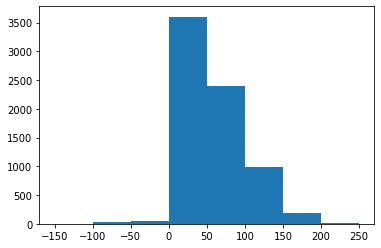

In [34]:
# plot distribution of temperatures excluding outliers
temperature_all.hist(bins=8, range=(-150, 250), grid=False)

In [35]:
# create as close to evenly distributed bins as possible (heavy
# population of 20 will make challenging or impossible), set bins to 11
# as ultimately gave 8 bins when dropping duplicates 
temperature_tiles = pd.qcut(temperature_all, 11, duplicates='drop')
temperature_tiles

0           (50.0, 60.0]
1          (90.0, 100.0]
2          (90.0, 100.0]
3           (60.0, 70.0]
6       (-163.001, 20.0]
              ...       
7664    (-163.001, 20.0]
7665    (-163.001, 20.0]
7666    (-163.001, 20.0]
7667    (-163.001, 20.0]
7669    (-163.001, 20.0]
Name: Temperature (Reaction Details) [C], Length: 7280, dtype: category
Categories (8, interval[float64]): [(-163.001, 20.0] < (20.0, 25.0] < (25.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 90.0] < (90.0, 100.0] < (100.0, 44124.0]]

## Create temperature dictionary from quantiles found

In [36]:
# combine bins into single list with counts and frequencies
temperature_list = list(zip(temperature_tiles.value_counts().index,
                            temperature_tiles.value_counts(),
                            temperature_tiles.value_counts(normalize=True)
                           )
                       )
                       
# create temperature dataframe for processing
temperature_columns = ['label', 'count', 'frequency']
temperature_df = pd.DataFrame(temperature_list, columns=temperature_columns)

# add column for category label 't'
temperature_df['category'] = 't'

# visualize dataframe
temperature_df

,label,count,frequency,category
0,"(-163.001, 20.0]",2933,0.402885,t
1,"(70.0, 90.0]",720,0.098901,t
2,"(50.0, 60.0]",641,0.088049,t
3,"(90.0, 100.0]",629,0.086401,t
4,"(100.0, 44124.0]",617,0.084753,t
5,"(60.0, 70.0]",588,0.080769,t
6,"(20.0, 25.0]",579,0.079533,t
7,"(25.0, 50.0]",573,0.078709,t


## Combine all condition dictionaries to single dictinoary describing the full label space
We again trim the label space for each sub-dictionary to avoid categorical sparsity (besides temperature). This is up to user preference.

In [37]:
# create dataframes for each reagent category for further processing
# set category names and labels
categories = {'metal': 'm', 'ligand': 'l', 'additive': 'a'}

# set open dictionary to store and call category dataframes
category_dataframes = {}

# iterate categories creating their dataframes and adding to dictionary
for category, label in categories.items():
    category_dataframes[f'{category}_df'] = nrl_grouped.get_group(label)

# filter each dataframe to top 95% by frequency within category
for category, dataframe in category_dataframes.items():
    cat_df = dataframe
    cat_df['frequency'] = cat_df['count'] / cat_df['count'].sum()
    cat_df['cumulative'] = cat_df.frequency.cumsum()
    cat_df = cat_df[cat_df['cumulative'] <= 0.95]
    cat_df.rename(columns={'reagent': 'label'}, inplace=True)
    category_dataframes[category] = cat_df

# add solvent and temperature dataframes to category dataframes
category_dataframes['solvent_df'] = solvent_df
category_dataframes['temperature_df'] = temperature_df

# visualize dataframe
category_dataframes

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

{'metal_df':    category                                              label  count  \
 0         m          tetrakis(triphenylphosphine) palladium(0)   1898   
 1         m          tris-(dibenzylideneacetone)dipalladium(0)    449   
 2         m      bis-triphenylphosphine-palladium(II) chloride    415   
 3         m                                palladium diacetate    356   
 4         m  (1,1'-bis(diphenylphosphino)ferrocene)palladiu...    332   
 5         m             bis(dibenzylideneacetone)-palladium(0)    331   
 6         m              bis(tri-t-butylphosphine)palladium(0)    248   
 8         m  dichloro(1,1'-bis(diphenylphosphanyl)ferrocene...    217   
 13        m  dichloro{bis[1-(dicyclohexylphosphanyl)piperid...    168   
 17        m          tris(dibenzylideneacetone)dipalladium (0)    103   
 18        m   bis(tricyclohexylphosphine)nickel(II) dichloride    101   
 19        m  palladium(l) tri-tert-butylphosphine iodide dimer    101   
 20        m  catalyst 1 (

# Final dictionary construction
A single series is constructed in the desired order, which will define the ultimate multi-label output vector in our predictive models. We apply this dictionary to the reaction data to construct ground truth reagent/condition vectors, which are used as outputs when training our models. This label processing is included in our preprocessor scripts in the main and dataset directories.

In [38]:
# set full dictionary vector as combined label space
dataframe_order = ['metal_df', 'ligand_df', 'temperature_df', 'solvent_df', 'additive_df']

# create series list of all labels and rearrange to desired order
dataframe_list = [(category_dataframes[df][['label', 'category']]) for df in dataframe_order]

# concatenate category dataframes into single dataframe
label_dataframe = pd.concat(dataframe_list, ignore_index=True)

# visualize dataframe
label_dataframe

,label,category
0,tetrakis(triphenylphosphine) palladium(0),m
1,tris-(dibenzylideneacetone)dipalladium(0),m
2,bis-triphenylphosphine-palladium(II) chloride,m
3,palladium diacetate,m
4,"(1,1'-bis(diphenylphosphino)ferrocene)palladiu...",m
...,...,...
100,sodium,a
101,1-methyl-1H-imidazole,a
102,tetrabutylammomium bromide,a
103,oxovanadium(V) ethoxydichloride,a


In [39]:
# optionally export dictionary dataframe as csv
label_dataframe.to_csv('negishi_dict.csv')